In [1]:
import os
os.getcwd()

'C:\\Users\\anish_yagt7hg\\Desktop\\internship'

#### IMPORTING PACKAGES

In [2]:
import numpy as np
import pandas as pd

In [3]:
os.chdir('C:/Users/anish_yagt7hg/Desktop/internship/ML_Hackathon_13_09_2019/AnomalyDetection')

In [4]:
os.listdir()

['IDS_MODEL.pickle', 'IDS_test_data.csv', 'IDS_train_data.csv', 'READ ME.txt']

#### The goal of this project is to detect anamolies in the system when the data packets are being sent from one server to another  in which it comes under INTRUSION DETECTION SYSTEMS and to classify whether the system is under Attack or Normal

#### READING THE DATA

In [5]:
df=pd.read_csv('IDS_train_data.csv')

In [6]:
#Reading the top 5  data instaces
df.head()

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,80,85751547,8,7,372,11595,372,0,46.500000,...,32,1174.0,0.0,1174,1174,85600000.0,0.0,85600000,85600000,DoS
1,1,80,99566897,6,7,368,11595,350,0,61.333333,...,20,11988.0,0.0,11988,11988,99500000.0,0.0,99500000,99500000,DoS
2,2,53,6883111,4,4,162,598,41,40,40.500000,...,20,163.0,0.0,163,163,6836319.0,0.0,6836319,6836319,BENIGN
3,3,443,4,3,0,18,0,6,6,6.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,443,4,2,0,12,0,6,6,6.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
#Gives the instances of data
df.shape

(519527, 80)

In [8]:
# Gives the ccolumns of data
df.columns

Index(['ID', 'Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN F

In [9]:
# Retrieving the categorial column in the data
ct=[]
for i in df.columns:
    if df.dtypes[i] =='object':
        ct.append(i)
    

In [10]:
ct

['Label']

#### DATA TYPES OF DATA

In [11]:
df.dtypes

ID                          int64
Destination Port            int64
Flow Duration               int64
Total Fwd Packets           int64
Total Backward Packets      int64
                           ...   
Idle Mean                 float64
Idle Std                  float64
Idle Max                    int64
Idle Min                    int64
Label                      object
Length: 80, dtype: object

#### CREATING A CUSTOM FUNCTION TO RETRIEVE  NO.OF UNIQUE VALUES IN EVERY COLUMN

In [12]:
def unique_val(column):
    return df[column].nunique()
    

In [13]:
df.columns

Index(['ID', 'Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN F

#### AS different columns exhibit different types of unique values I have chosen such columns where if there are less than 10 unique values and type casted into categorical data

In [14]:
to_type_cast=[]
for  i in df.columns:
    if unique_val(i)<10:
        to_type_cast.append(i)

In [15]:
#The columns which have less than 10 unique values
to_type_cast

['Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 'CWE Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate',
 'Label']

In [16]:
# cross checked how many unique values are there in the above criterion
for i in to_type_cast:
    print(i,df[i].nunique())
    

Fwd PSH Flags 2
Bwd PSH Flags 1
Fwd URG Flags 1
Bwd URG Flags 1
FIN Flag Count 2
SYN Flag Count 2
RST Flag Count 2
PSH Flag Count 2
ACK Flag Count 2
URG Flag Count 2
CWE Flag Count 1
ECE Flag Count 2
Fwd Avg Bytes/Bulk 1
Fwd Avg Packets/Bulk 1
Fwd Avg Bulk Rate 1
Bwd Avg Bytes/Bulk 1
Bwd Avg Packets/Bulk 1
Bwd Avg Bulk Rate 1
Label 3


In most of the columns as there are less than 5 unique values ,typecasted to  categorical data

In [17]:
for i in to_type_cast:
    df[i]=df[i].astype('object')

In [18]:
#Retreived the columns where there are 15 unique values in a column
for i in df.columns:
    if df[i].nunique()==15:
        print(i)

Down/Up Ratio


#### CHECKING WHAT ARE THE UNIQUE VALUE  IN 'DOWN/UP RATIO' COLUMN

In [19]:
#
df.loc[:,'Down/Up Ratio'].unique()

array([ 0,  1,  2,  4,  5,  3,  9,  6,  7, 29, 10, 12, 27,  8, 39],
      dtype=int64)

#### RETRIEVING THE NUMERICAL COLUMNS FROM GIVEN DATA

In [20]:

for i in df.columns:
    if df.dtypes[i]!='object':
        print(i)

ID
Destination Port
Flow Duration
Total Fwd Packets
Total Backward Packets
Total Length of Fwd Packets
Total Length of Bwd Packets
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow Bytes/s
Flow Packets/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Total
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Total
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd Header Length
Bwd Header Length
Fwd Packets/s
Bwd Packets/s
Min Packet Length
Max Packet Length
Packet Length Mean
Packet Length Std
Packet Length Variance
Down/Up Ratio
Average Packet Size
Avg Fwd Segment Size
Avg Bwd Segment Size
Fwd Header Length.1
Subflow Fwd Packets
Subflow Fwd Bytes
Subflow Bwd Packets
Subflow Bwd Bytes
Init_Win_bytes_forward
Init_Win_bytes_backward
act_data_pkt_fwd
min_seg_size_forward
Active Mean
Active Std
Active Max
Active Min
Idle Mean
Idle Std
Idl

In [25]:
#DROPPING OF ID COLUMN AS INDEX REPRESENTS THE SAME
df=df.drop('ID',axis=1)

KeyError: "['ID'] not found in axis"

In [26]:
#both represents the same as it gives the shape of columns
print(len(df.columns))
print(df.shape[1])

79
79


#### checking how  much percentage of values are there if  it any of them contains  inf or nan

In [28]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]['Label'].value_counts()/len(df)*100

DoS       0.138973
BENIGN    0.050238
Name: Label, dtype: float64

#### Subsetting thos e datapoints which are not inf and nan as there is no proper explanation of why these values are occured it's better to study those values seperately

In [29]:
df1=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)] 

In [27]:
df1.shape

(518544, 79)

#### EXPLORATORY ANALYSIS

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [31]:
df['Label'].unique()

array(['DoS', 'BENIGN', 'Heartbleed'], dtype=object)

In [32]:
df1[df1['Label']=="Heartbleed"]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
5626,444,119259886,2782,2091,12264,7879536,4344,0,4.408339,83.390470,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
74904,444,24719667,590,436,7442,1636683,5792,0,12.613559,238.708658,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
153170,444,119262215,2792,2110,13712,7878135,5792,0,4.911175,110.376448,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
179526,444,119299621,2805,2028,13712,7878627,5792,0,4.888414,110.120790,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
203936,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,...,32,2217.0,0.0,2217,2217,5024984.0,0.0,5024984,5024984,Heartbleed
218721,444,119297996,2782,2089,9368,7882432,1448,0,3.367362,30.505030,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
267547,444,119260295,2791,2114,13712,7878088,5792,0,4.912934,110.396187,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
441706,444,119296592,2797,2006,13712,7878088,5792,0,4.902395,110.277907,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed


In [36]:

df1[df1['Label']=="Heartbleed"].shape[0]/len(df1)*100


0.0015427813261748278

#### AS there are only 8 instances it's better to remove those intsnces as it accounts 0.00015 percentage of data

In [37]:
#subsetting the data in which Heartbleed is not there
df1=df1[df1['Label']!='Heartbleed']

#### ANALYSIS OF " Label "  COLUMN

#### Plotting  label column and  checking how much percentage of data instances are there in the target column 

In [46]:
df1['Label'].value_counts()/len(df1) *100

BENIGN    63.559521
DoS       36.440479
Name: Label, dtype: float64

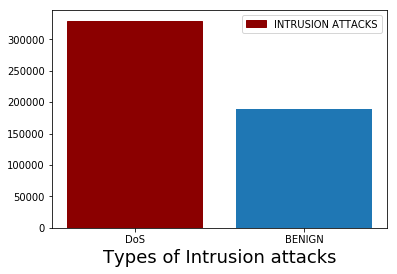

In [62]:
label_counts=df1['Label'].value_counts().tolist()
Label_names=df1['Label'].unique().tolist()
ax=plt.bar(Label_names,label_counts,label='INTRUSION ATTACKS')
ax[0].set_color('darkred')
plt.xlabel('Types of Intrusion attacks',fontsize=18)
plt.legend()
plt.show()

#### ANALAYSIS OF NUMERIC COLUMNS AND CHECKING WETHER THEY ARE NORMALLY DISTRIBUTED BY PLOTTING A NORMAL CURVE

In [63]:
df['Flow Duration'].nunique()

280238

#### CUSTOM FUNCTION FOR PLOTTING THE NOTMAL CUTRVE

In [64]:
def plot_normal_curve(column):
    val=df1[column].values.tolist()
    val.sort()
    val_mean = np.mean(val)
    val_std = np.std(val)
    pdf = stats.norm.pdf(val, val_mean, val_std)
    return plt.plot(val, pdf)

In [65]:
df['Flow Duration'].max()

119999997

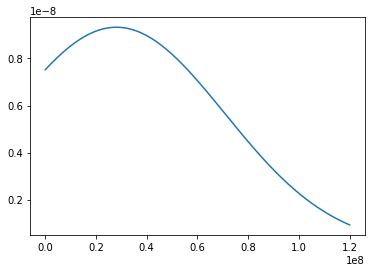

In [66]:
plot_normal_curve('Flow Duration')

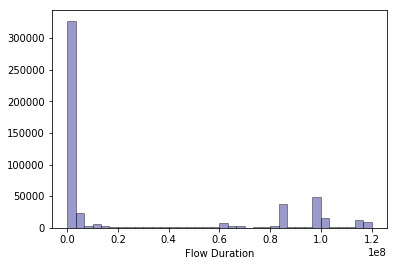

In [67]:
sns.distplot(df['Flow Duration'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [68]:
df[df['Total Fwd Packets']==1].count()

Destination Port               77385
Flow Duration                  77385
Total Fwd Packets              77385
Total Backward Packets         77385
Total Length of Fwd Packets    77385
                               ...  
Idle Mean                      77385
Idle Std                       77385
Idle Max                       77385
Idle Min                       77385
Label                          77385
Length: 79, dtype: int64

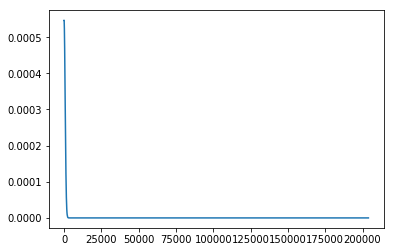

In [69]:
plot_normal_curve('Total Fwd Packets')

#### AS there are 80 columns for determining the predictionof the system instead of taking all the columns and 
determining the output just took  if any columns have less than 40 percent correlation

In [70]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [73]:
df1=correlation(df1,0.4)

In [74]:
df1.shape

(518536, 35)

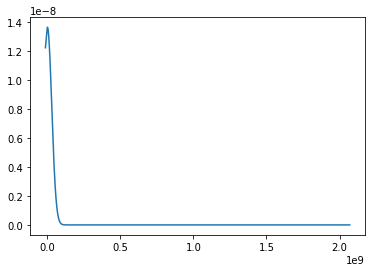

In [76]:
plot_normal_curve('Flow Bytes/s')

In [77]:
df[df['Flow Packets/s']<0]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2127,58486,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
16720,80,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
27299,443,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
31182,51927,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
66015,80,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
148456,80,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
180964,443,-1,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
261008,51838,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
269575,80,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
300199,53290,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


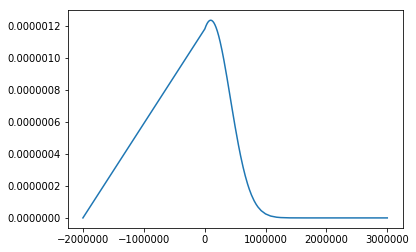

In [78]:
plot_normal_curve('Flow Packets/s')

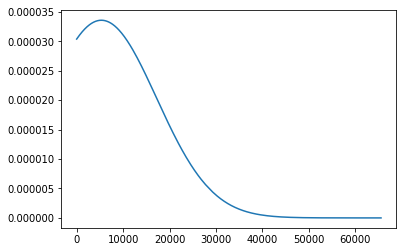

In [79]:
plot_normal_curve('Init_Win_bytes_forward')

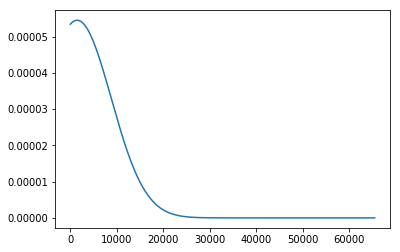

In [80]:
plot_normal_curve('Init_Win_bytes_backward')

In [81]:
df1.dtypes

Destination Port             int64
Flow Duration                int64
Total Fwd Packets            int64
Fwd Packet Length Min        int64
Fwd Packet Length Mean     float64
Flow Bytes/s               float64
Flow Packets/s             float64
Flow IAT Min                 int64
Bwd IAT Min                  int64
Fwd PSH Flags               object
Bwd PSH Flags               object
Fwd URG Flags               object
Bwd URG Flags               object
Bwd Packets/s              float64
FIN Flag Count              object
SYN Flag Count              object
RST Flag Count              object
PSH Flag Count              object
ACK Flag Count              object
URG Flag Count              object
CWE Flag Count              object
ECE Flag Count              object
Down/Up Ratio                int64
Fwd Avg Bytes/Bulk          object
Fwd Avg Packets/Bulk        object
Fwd Avg Bulk Rate           object
Bwd Avg Bytes/Bulk          object
Bwd Avg Packets/Bulk        object
Bwd Avg Bulk Rate   

In [82]:
df1.shape

(518536, 35)

#### AFTER APPLYING THE ABOVE CUSTOM FUNCTION OF CORRELATION CHECKING WHICH OF THE COLUMNS ARE CATEGORICAL

In [85]:
for i in df1.columns:
    if df1.dtypes[i]=='object':
        print(i)

Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
FIN Flag Count
SYN Flag Count
RST Flag Count
PSH Flag Count
ACK Flag Count
URG Flag Count
CWE Flag Count
ECE Flag Count
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg Bytes/Bulk
Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate
Label


#### IF ANY OF THE COLUMN CONTAINS ONLY ONE UNIQUE VALUE RETREIVE THE COLUMN FROM THE DATA AND DROP THOSE FROM THE AXIS

In [86]:
for i in df1.columns:
    if df1[i].nunique()==1:
        print(i)
        print(df1[i].value_counts())
        

Bwd PSH Flags
0    518536
Name: Bwd PSH Flags, dtype: int64
Fwd URG Flags
0    518536
Name: Fwd URG Flags, dtype: int64
Bwd URG Flags
0    518536
Name: Bwd URG Flags, dtype: int64
CWE Flag Count
0    518536
Name: CWE Flag Count, dtype: int64
Fwd Avg Bytes/Bulk
0    518536
Name: Fwd Avg Bytes/Bulk, dtype: int64
Fwd Avg Packets/Bulk
0    518536
Name: Fwd Avg Packets/Bulk, dtype: int64
Fwd Avg Bulk Rate
0    518536
Name: Fwd Avg Bulk Rate, dtype: int64
Bwd Avg Bytes/Bulk
0    518536
Name: Bwd Avg Bytes/Bulk, dtype: int64
Bwd Avg Packets/Bulk
0    518536
Name: Bwd Avg Packets/Bulk, dtype: int64
Bwd Avg Bulk Rate
0    518536
Name: Bwd Avg Bulk Rate, dtype: int64


In [54]:
df1['Bwd PSH Flags'].value_counts()

0    518536
Name: Bwd PSH Flags, dtype: int64

#### DROIPPING THOSE COLUMNS BY APPENDING THE COLUMNS INTO A LIST AND THEREBY DROPPING FROM THE AXIS

In [88]:
drop=[]
for i in df1.columns:
    if df1[i].nunique()==1:
        drop.append(i)

In [89]:
drop

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'CWE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [91]:
# DROPPED COLUMNS
df1=df1.drop(drop,axis=1)

KeyError: "['Bwd PSH Flags' 'Fwd URG Flags' 'Bwd URG Flags' 'CWE Flag Count'\n 'Fwd Avg Bytes/Bulk' 'Fwd Avg Packets/Bulk' 'Fwd Avg Bulk Rate'\n 'Bwd Avg Bytes/Bulk' 'Bwd Avg Packets/Bulk' 'Bwd Avg Bulk Rate'] not found in axis"

In [92]:
df1.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Min', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd Packets/s', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count',
       'Down/Up Ratio', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active Mean', 'Idle Std', 'Label'],
      dtype='object')

In [93]:
df1.shape

(518536, 25)

In [94]:
df1.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Min', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd Packets/s', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count',
       'Down/Up Ratio', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active Mean', 'Idle Std', 'Label'],
      dtype='object')

In [95]:
df1['FIN Flag Count'].nunique()

2

#### CHECKING UNIQUE VALUES IN THE COLUMNS

In [96]:

for  i  in df1.columns:
    print(i,df1.dtypes[i],df1[i].nunique())

Destination Port int64 26597
Flow Duration int64 280229
Total Fwd Packets int64 602
Fwd Packet Length Min int64 208
Fwd Packet Length Mean float64 26107
Flow Bytes/s float64 343587
Flow Packets/s float64 297515
Flow IAT Min int64 38858
Bwd IAT Min int64 15218
Fwd PSH Flags object 2
Bwd Packets/s float64 275476
FIN Flag Count object 2
SYN Flag Count object 2
RST Flag Count object 2
PSH Flag Count object 2
ACK Flag Count object 2
URG Flag Count object 2
ECE Flag Count object 2
Down/Up Ratio int64 15
Init_Win_bytes_forward int64 5033
Init_Win_bytes_backward int64 5218
min_seg_size_forward int64 12
Active Mean float64 60874
Idle Std float64 31056
Label object 2


In [98]:
df1['Down/Up Ratio'].value_counts()

1     264315
0     242962
2       9795
3        839
4        446
5        121
6         21
7         20
8          6
29         3
39         2
27         2
10         2
12         1
9          1
Name: Down/Up Ratio, dtype: int64

In [64]:
df1['min_seg_size_forward'].value_counts()

32    270172
20    234752
40     12162
44       755
28       364
0        242
56        39
48        25
60         8
52         8
24         8
36         1
Name: min_seg_size_forward, dtype: int64

#### SELECTING THE NUMERFICAL COLUMNS AND PLOTTING THE NUMERICAL DATA


In [100]:
df1.select_dtypes(include='float')

,Fwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Bwd Packets/s,Active Mean,Idle Std
0,46.500000,1.395543e+02,0.174924,0.081631,1174.0,0.0
1,61.333333,1.201504e+02,0.130565,0.070304,11988.0,0.0
2,40.500000,1.104152e+02,1.162265,0.581133,163.0,0.0
3,6.000000,4.500000e+06,750000.000000,0.000000,0.0,0.0
4,6.000000,3.000000e+06,500000.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...
519522,68.000000,1.407299e+02,0.140695,0.070347,1.0,0.0
519523,41.000000,1.315436e+06,26845.637580,13422.818790,0.0,0.0
519524,68.400000,1.212571e+02,0.121897,0.071107,12998.0,0.0
519525,40.000000,1.805128e+06,20512.820510,10256.410260,0.0,0.0


In [103]:
df1['Fwd PSH Flags'].value_counts()

0    496766
1     21770
Name: Fwd PSH Flags, dtype: int64

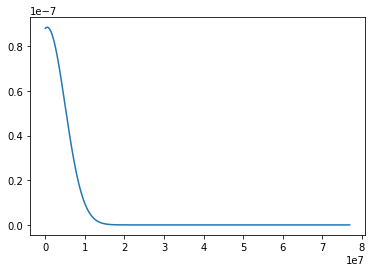

In [104]:
plot_normal_curve('Idle Std')

#### AFTER ALL FINAL ALTERATIONS TO COLUMNS IN THE DATA THE FINAL DATA THAT  IS PREPPED FOR MODELLING OF DATA 

In [105]:

df1.shape

(518536, 25)

In [139]:
df1.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Min', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd Packets/s', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count',
       'Down/Up Ratio', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active Mean', 'Idle Std', 'Label'],
      dtype='object')

#### TRAIN TEST SPLIT AND SCALING

#### SPLITTING THE DATA INTO TRAIN AND TEST

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [107]:
import warnings
warnings.filterwarnings("ignore")


#### Instead of directly applying to df1 made a copy of it and use it for further analysis

In [138]:
X=df1.copy().drop(columns=['Label'],axis=1)
Y=df1['Label']

In [140]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=45)

In [141]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(466682, 24)
(51854, 24)
(466682,)
(51854,)


#### STANDIRDIZING THE DATA OF NUMERICAL COLUMNS

In [142]:
num_col=[]
for i in df1.columns:
    if df1[i].dtypes!='object':
        num_col.append(i)
        
        

In [143]:
num_col


['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Min',
 'Bwd IAT Min',
 'Bwd Packets/s',
 'Down/Up Ratio',
 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward',
 'min_seg_size_forward',
 'Active Mean',
 'Idle Std']

In [144]:
scaler=StandardScaler()
scaler.fit(X_train[num_col])
X_train[num_col]=scaler.transform(X_train[num_col])
X_test[num_col]=scaler.transform(X_test[num_col])

#### TO CHECK WETHER ANY MISSING COLUMNS 

In [114]:
set(X_train.columns)-set(X_test.columns)

set()

#### EVALUATION OF METRICS

In [115]:
def evaluate(true, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score
    from sklearn.metrics import precision_score, recall_score, f1_score

    precision = precision_score(Y_test, pred,pos_label='DoS')
    recall = recall_score(Y_test, pred,pos_label='DoS')
    f1 = f1_score(Y_test, pred,pos_label='DoS')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")


In [116]:
def evaluate_train(true, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score
    from sklearn.metrics import precision_score, recall_score, f1_score

    precision = precision_score(Y_train, pred,pos_label='DoS')
    recall = recall_score(Y_train, pred,pos_label='DoS')
    f1 = f1_score(Y_train, pred,pos_label='DoS')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")


#### LOGISTIC REGRESSION

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [148]:
lm_model=LogisticRegression(class_weight=None,solver='lbfgs',max_iter=10000)
%time lm_model.fit(X_train,Y_train)


Wall time: 25.6 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

#### PREDICTIONS ON TRAIN AND VALIDATION

In [149]:
lm_trpred=lm_model.predict(X_train)
lm_testpred=lm_model.predict(X_test)

In [150]:
evaluate(Y_test,lm_testpred)

CONFUSION MATRIX:
[[31966   915]
 [  859 18114]]
ACCURACY SCORE:
0.9658
CLASSIFICATION REPORT:
	Precision: 0.9519
	Recall: 0.9547
	F1_Score: 0.9533


In [151]:
evaluate_train(Y_train,lm_trpred)

CONFUSION MATRIX:
[[288361   8337]
 [  6803 163181]]
ACCURACY SCORE:
0.9676
CLASSIFICATION REPORT:
	Precision: 0.9514
	Recall: 0.9600
	F1_Score: 0.9557


In [122]:
from sklearn.model_selection import learning_curve

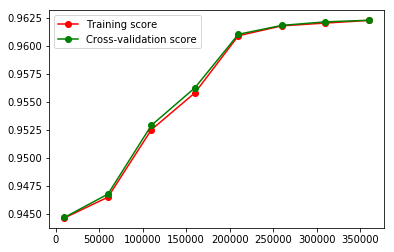

In [152]:
train_sizes = [np.arange(10000,410000,50000)]
from sklearn.model_selection import learning_curve
#train_sizes, train_scores, test_scores = learning_curve(
        #estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
train_sizes, train_scores, test_scores = learning_curve(estimator=lm_model, X=X_train, y=Y_train, cv=8, train_sizes=train_sizes,n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score


In [124]:
 scores = cross_val_score(lm_model, X_train,Y_train,cv=8, scoring=make_scorer(precision_score,pos_label='DoS'),n_jobs=-1)
scores

array([0.91830949, 0.91761264, 0.91540404, 0.92007874, 0.91783689,
       0.9212657 , 0.91513043, 0.91952212])

In [125]:
probs=lm_model.predict_proba(X_test)
probs=probs[:,1]

In [126]:
roc_auc_score(Y_test,probs)

0.9925729478384456

#### RIDGE CLASSIFIER

In [127]:
from sklearn.linear_model import RidgeClassifierCV

In [131]:
CV_Rdg =RidgeClassifierCV(alphas=np.arange(0.01,0.5,0.02),cv=8)
%time CV_Rdg.fit(X_train,Y_train)

Wall time: 5min 19s


RidgeClassifierCV(alphas=array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49]),
         class_weight=None, cv=8, fit_intercept=True, normalize=False,
         scoring=None, store_cv_values=False)

#### PREDICTIONS OF RIDGE CLASSIFIER

In [133]:
CV_TR_Pred=CV_Rdg.predict(X_train)
CV_TE_Pred=CV_Rdg.predict(X_test)

In [134]:
evaluate(Y_test,CV_TE_Pred)

CONFUSION MATRIX:
[[30648  2233]
 [ 2184 16789]]
ACCURACY SCORE:
0.9148
CLASSIFICATION REPORT:
	Precision: 0.8826
	Recall: 0.8849
	F1_Score: 0.8837


In [135]:
evaluate_train(Y_train,CV_TR_Pred)

CONFUSION MATRIX:
[[275997  20701]
 [ 18601 151383]]
ACCURACY SCORE:
0.9158
CLASSIFICATION REPORT:
	Precision: 0.8797
	Recall: 0.8906
	F1_Score: 0.8851


In [136]:
from sklearn.model_selection import learning_curve

In [148]:
 scores = cross_val_score(CV_Rdg, X_train,Y_train,cv=8, scoring=make_scorer(precision_score,pos_label='DoS'),n_jobs=-1)
scores

array([0.90660769, 0.91004175, 0.90471218, 0.90540417, 0.9078665 ,
       0.90563977, 0.90711877, 0.90770638])

#### DECISION TREE CLASSIFIER

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dtc= DecisionTreeClassifier(max_features='sqrt',
                                   criterion='entropy', max_depth= 6 ,min_samples_leaf=10)
%time dtc.fit(X_train,Y_train)

Wall time: 2.28 s


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### PREDICTIONS ON TRAIN AND VALIDATION

In [155]:
pred_train = dtc.predict(X_train)
pred_test = dtc.predict(X_test)

In [156]:
evaluate(Y_test,pred_test)

CONFUSION MATRIX:
[[31640  1241]
 [  481 18492]]
ACCURACY SCORE:
0.9668
CLASSIFICATION REPORT:
	Precision: 0.9371
	Recall: 0.9746
	F1_Score: 0.9555


In [157]:
roc_auc_score(Y_test,dtc.predict_proba(X_test)[:,1])

0.991830302011451

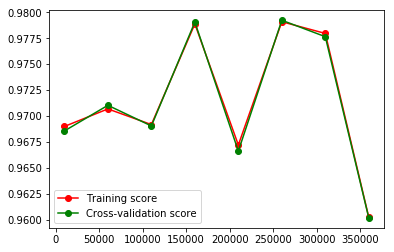

In [160]:
train_sizes = [np.arange(10000,410000,50000)]
from sklearn.model_selection import learning_curve
#train_sizes, train_scores, test_scores = learning_curve(
        #estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
train_sizes, train_scores, test_scores = learning_curve(estimator=dtc, X=X_train, y=Y_train, cv=8, train_sizes=train_sizes,n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")

In [158]:
scores = cross_val_score(dtc, X_train,Y_train,cv=8, scoring=make_scorer(precision_score,pos_label='DoS'),n_jobs=-1)
scores

array([0.94480745, 0.94267608, 0.9482588 , 0.90331466, 0.92245245,
       0.94882353, 0.94174136, 0.94798214])

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
parameters=param_grid = {
           "max_depth" : np.arange(2,14,2),
           "min_samples_leaf" : [5, 10, 15, 20],
           "class_weight" : ['balanced',None],
             "criterion":['gini','entropy'],'max_features':['auto','sqrt','log2']}
clf=GridSearchCV(DecisionTreeClassifier(max_features='sqrt',class_weight='balanced'),param_grid=parameters,
                                             n_jobs=-1,cv=10,refit=True)
%time clf.fit(X_train,Y_train)
print(clf.best_score_)
print(clf.best_params_)

Wall time: 1h 51min 7s
0.9969743851273458
{'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 5}


In [168]:
dtc_2 = clf.best_estimator_
pred_train1=clf.best_estimator_.predict(X_train)
pred_test1=clf.best_estimator_.predict(X_test)

In [169]:
evaluate(Y_test,pred_test1)

CONFUSION MATRIX:
[[32851   138]
 [    6 18859]]
ACCURACY SCORE:
0.9972
CLASSIFICATION REPORT:
	Precision: 0.9927
	Recall: 0.9997
	F1_Score: 0.9962


In [171]:
scores = cross_val_score(dtc_2, X_train,Y_train,cv=8, scoring=make_scorer(precision_score,pos_label='DoS'),n_jobs=-1)
scores

array([0.99266012, 0.99322208, 0.99443171, 0.98789797, 0.99040666,
       0.99555056, 0.9976528 , 0.99825932])

#### KNN CLLASIFIER

In [81]:
#knn_pred_train=knn_clf.predict(X_train)
knn_pred_test=knn_clf.predict(X_test)

In [84]:
evaluate(Y_test,knn_pred_test)

CONFUSION MATRIX:
[[32963    26]
 [    8 18857]]
ACCURACY SCORE:
0.9993
CLASSIFICATION REPORT:
	Precision: 0.9986
	Recall: 0.9996
	F1_Score: 0.9991


#### NAIVE BAYES

In [161]:
from sklearn.naive_bayes import GaussianNB

In [163]:
GNB=GaussianNB(var_smoothing=0.1)
%time GNB.fit(X_train,Y_train)


Wall time: 2.14 s


GaussianNB(priors=None, var_smoothing=0.1)

#### PREDICTIONS ON TRAIN AND VALIDATION

In [164]:
GNB_train=GNB.predict(X_train  )
GNb_te=GNB.predict(X_test)

In [165]:
evaluate(Y_test,GNb_te)


CONFUSION MATRIX:
[[12045 20836]
 [ 1998 16975]]
ACCURACY SCORE:
0.5596
CLASSIFICATION REPORT:
	Precision: 0.4489
	Recall: 0.8947
	F1_Score: 0.5979


In [117]:
scores = cross_val_score(GNB, X_train,Y_train,cv=8, scoring=make_scorer(precision_score,pos_label='DoS'),n_jobs=-1)
scores

array([0.79613141, 0.79983836, 0.79987692, 0.79061386, 0.7941311 ,
       0.7946787 , 0.79845199, 0.79599801])

In [166]:
roc_auc_score(Y_test,GNB.predict_proba(X_test)[:,1])

0.9005947592827716

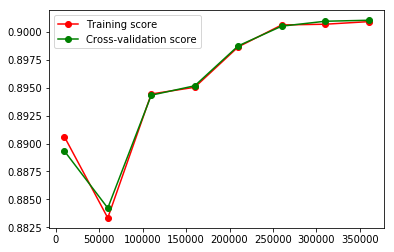

In [120]:
train_sizes = [np.arange(10000,410000,50000)]
from sklearn.model_selection import learning_curve
#train_sizes, train_scores, test_scores = learning_curve(
        #estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
train_sizes, train_scores, test_scores = learning_curve(estimator=GNB, X=X_train, y=Y_train, cv=10, train_sizes=train_sizes,n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")

#### RANDOM FOREST CLASSIFIER

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rfc=RandomForestClassifier()
%time rfc.fit(X = X_train,y = Y_train)

Wall time: 9.71 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### PREDICTIONS ON TRAIN AND VALIDATION

In [157]:
train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)

In [158]:
evaluate(Y_test,test_predictions)

CONFUSION MATRIX:
[[32972    17]
 [    3 18862]]
ACCURACY SCORE:
0.9996
CLASSIFICATION REPORT:
	Precision: 0.9991
	Recall: 0.9998
	F1_Score: 0.9995


In [159]:
roc_auc_score(Y_test,rfc.predict_proba(X_test)[:,1])

0.999979752143646

In [98]:
len(Y_train)

466682

In [99]:
len(train_predictions)

466682

In [101]:
evaluate_train(Y_train,train_predictions)

CONFUSION MATRIX:
[[296541     49]
 [     5 170087]]
ACCURACY SCORE:
0.9999
CLASSIFICATION REPORT:
	Precision: 0.9997
	Recall: 1.0000
	F1_Score: 0.9998


#### RANDOM FOREST WITH  RANDOMIZEDSEARCH CV

In [103]:
from sklearn.model_selection import RandomizedSearchCV 

In [108]:
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced_subsample')
param_grid = {"n_estimators" : [  100,200,300,400],
           "max_depth" :[4,6,8,10,12],
           "min_samples_leaf" : [5, 10, 15, 20],
           "class_weight" : ['balanced','balanced_subsample'],
             "criterion":['gini','entropy']}
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 7, n_iter=20,
                                scoring =make_scorer(precision_score,pos_label='DoS'))


In [109]:
%time rfc_cv_grid.fit(X_train, Y_train)

Wall time: 2h 53min 31s


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 300, 400], 'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [5, 10, 15, 20], 'class_weight': ['balanced', 'balanced_subsample'], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(precision_score, pos_label=DoS), verbose=0)

In [112]:
rfc_cv_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=12, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [113]:
#rfc_train_predictions = rfc_cv_grid.best_estimator_.predict(X_train)
rfc_test_predictions = rfc_cv_grid.best_estimator_.predict(X_test)

In [114]:
evaluate(Y_test,rfc_test_predictions)

CONFUSION MATRIX:
[[32959    30]
 [    2 18863]]
ACCURACY SCORE:
0.9994
CLASSIFICATION REPORT:
	Precision: 0.9984
	Recall: 0.9999
	F1_Score: 0.9992


#### GRADIENT BOOST CLASSIFIER

In [167]:
len(X_train.columns)

24

In [168]:
from sklearn.ensemble import GradientBoostingClassifier

In [169]:
GB=GradientBoostingClassifier(loss='deviance',learning_rate=0.05,n_estimators=120,max_depth=6,max_features='sqrt')
%time GB.fit(X_train,Y_train)

Wall time: 1min 52s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### PREDICTIONS ON TRAIN AND VALIDATION

In [170]:
GB_TRAIN_PRED=GB.predict(X_train)
GB_TEST_PRED=GB.predict(X_test)

In [171]:
evaluate(Y_test,GB_TEST_PRED)

CONFUSION MATRIX:
[[32822    59]
 [    8 18965]]
ACCURACY SCORE:
0.9987
CLASSIFICATION REPORT:
	Precision: 0.9969
	Recall: 0.9996
	F1_Score: 0.9982


In [172]:
evaluate_train(Y_train,GB_TRAIN_PRED)

CONFUSION MATRIX:
[[296203    495]
 [    82 169902]]
ACCURACY SCORE:
0.9988
CLASSIFICATION REPORT:
	Precision: 0.9971
	Recall: 0.9995
	F1_Score: 0.9983


In [111]:
scores = cross_val_score(GB, X_train,Y_train,cv=8, scoring=make_scorer(precision_score,pos_label='DoS'),n_jobs=-1)
scores

array([0.99657598, 0.99765313, 0.99695122, 0.99709084, 0.99690402,
       0.99741893, 0.99713763, 0.99835526])

In [161]:
roc_auc_score(Y_test,GB.predict_proba(X_test)[:,1])

0.9449678818559354

#### ADABOOST CLASSIFIER

In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=9,class_weight='balanced',max_features='sqrt'),
    n_estimators = 200,
    learning_rate = 0.2)

In [98]:
ADB=%time Adaboost_model.fit(X_train,Y_train)

Wall time: 52min 48s


#### PREDICTIONS ON TRAIN AND TEST

In [99]:
ADB_TR_PRED=ADB.predict(X_train)
ADB_TEST_PRED=ADB.predict(X_test)

In [101]:
evaluate(Y_test,ADB_TEST_PRED)

CONFUSION MATRIX:
[[32983     6]
 [    1 18864]]
ACCURACY SCORE:
0.9999
CLASSIFICATION REPORT:
	Precision: 0.9997
	Recall: 0.9999
	F1_Score: 0.9998


In [164]:
roc_auc_score(Y_test,ADB.predict_proba(X_test)[:,1])

0.9999835892899814

In [105]:
from sklearn.metrics import roc_auc_score

#### AS  we have applied the machine learning approaches we consider precision as a scorer function because in this case precision is more importantly chosen as a metric  as to  fin accurate predictions and we found that from all of the following  results along with cross validation and parameter tuning we found that decision tree algorithm tends to give better result so decision tree was chosen as an final algorithm.


#### SAVING THE MODEL

#### Pickle module helps us to create  model objects for the further predictions on real time data

In [174]:
import pickle

In [176]:
with open('IDS_2_MODEL.pickle','wb') as f:
    pickle.dump(dtc,f)

In [190]:
loaded_model = pickle.load(open('IDS_2_MODEL.pickle', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9667913757858603


In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

#### WRITING METRICS INTO CSV

In [181]:
metrics={'ACCURACY':accuracy_score(pred_test,Y_test),
        'precision': precision_score(Y_test, pred_test,pos_label='DoS'),
    'Recall':recall_score(Y_test, pred_test,pos_label='DoS'),
    'F1_score' :f1_score(Y_test, pred_test,pos_label='DoS')}

In [185]:
metrics

{'ACCURACY': 0.9667913757858603,
 'precision': 0.9371104241625703,
 'Recall': 0.9746481842618457,
 'F1_score': 0.9555107735234847}

In [189]:
pd.DataFrame.from_dict([metrics],orient='columns').to_csv('INTRUSION_DETECTION_SYSTEMS_metrics.csv', header=True)

#### TEST DATA

In [191]:
os.listdir()

['IDS_1_MODEL.pickle',
 'IDS_2_MODEL.pickle',
 'IDS_MODEL.pickle',
 'IDS_test_data.csv',
 'IDS_train_data.csv',
 'INTRUSION_DETECTION_SYSTEMS_metrics.csv',
 'INTRUSION_DETECTION_SYSTEMS_metrics1.csv',
 'READ ME.txt']

In [239]:
def test_data(data):
    test=pd.read_csv(data)
    
    final_columns=[i for i in X.columns if i  in test.columns]
    
    test=pd.DataFrame(test,columns=final_columns)
    
    test=test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]
    
    for i in X.select_dtypes(include='object').columns:
        if i in test.columns:
            test[i]=test[i].astype('object')
    
    test[num_col]=scaler.fit_transform(test[num_col])
    
    test_predictions=test_data_predictions(test)
    
    return test_predictions

In [237]:
def test_data_predictions(data):
    loaded_model = pickle.load(open('IDS_MODEL.pickle', 'rb'))
    predictions=loaded_model.predict(test)
    return predictions

In [241]:
test_labels=test_data('IDS_test_data.csv')

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [242]:
pd.DataFrame(test_labels).to_csv("IDS_test_predictions.csv")